In [1]:
!python -V

Python 3.7.11


In [1]:
# necessary import
import pandas as pd

In [2]:
# loading the dataset
df = pd.read_csv("../dataset.txt", header= None, sep = " ")
df.head()

,0,1,2
0,15.25,2.40,B
1,7.43,1.66,C
2,7.17,2.75,C
3,2.93,1.21,A
4,11.07,0.39,C


In [3]:
# renaming the column
# X : "Time", Y :"Size", Z: "fishingrod"
df.columns = ["X", "Y", "Z"]
df.head(5)

,X,Y,Z
0,15.25,2.40,B
1,7.43,1.66,C
2,7.17,2.75,C
3,2.93,1.21,A
4,11.07,0.39,C


In [4]:
def convert_into_hrs(x):
    x = str(x)
    hr_min_arr = x.split(".")
    mins = int((int(hr_min_arr[1]) * 60)/100)
    hr_min = float(hr_min_arr[0] + "." + str(mins))
    return hr_min

df["X"] = df.X.map(lambda x: convert_into_hrs(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       400 non-null    float64
 1   Y       400 non-null    float64
 2   Z       400 non-null    object 
dtypes: float64(2), object(1)
memory usage: 9.5+ KB


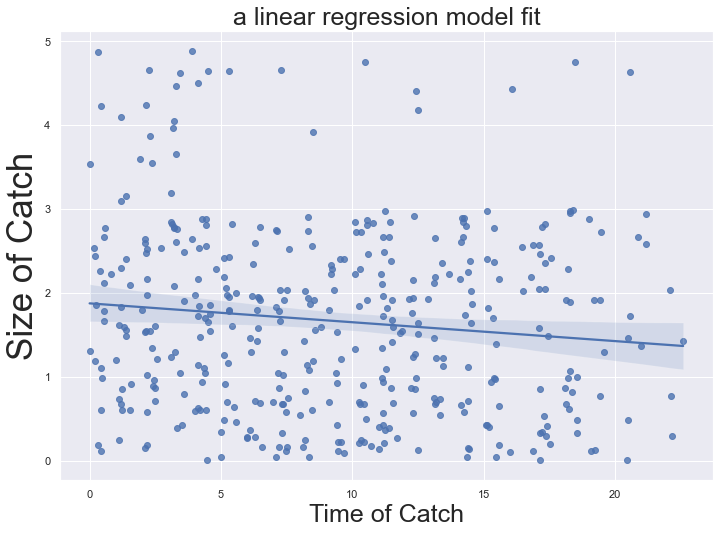

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns.scatterplot(x='X', y='Y', data=df)
sns.regplot(data = df, x=df['X'], y=df['Y'])
plt.title('a linear regression model fit', size = 25)
plt.xlabel('Time of Catch', size = 25)
plt.ylabel('Size of Catch', size = 35)
plt.savefig('A linear regression model fit.png')

In [19]:
df.Y

0      2.40
1      1.66
2      2.75
3      1.21
4      0.39
       ... 
395    0.83
396    2.67
397    3.55
398    1.05
399    0.87
Name: Y, Length: 400, dtype: float64

In [6]:
import numpy as np
y_values = df.Y.values
y_values = np.sort(y_values)
y_values

array([0.01, 0.01, 0.01, 0.04, 0.04, 0.05, 0.05, 0.05, 0.09, 0.1 , 0.11,
       0.11, 0.11, 0.11, 0.11, 0.13, 0.13, 0.14, 0.14, 0.15, 0.15, 0.16,
       0.16, 0.16, 0.16, 0.18, 0.19, 0.19, 0.19, 0.2 , 0.21, 0.21, 0.22,
       0.22, 0.22, 0.25, 0.25, 0.25, 0.27, 0.27, 0.28, 0.28, 0.29, 0.3 ,
       0.33, 0.33, 0.33, 0.34, 0.34, 0.36, 0.37, 0.39, 0.39, 0.4 , 0.4 ,
       0.41, 0.42, 0.42, 0.43, 0.43, 0.43, 0.46, 0.49, 0.49, 0.49, 0.5 ,
       0.53, 0.55, 0.55, 0.57, 0.57, 0.58, 0.58, 0.58, 0.59, 0.6 , 0.6 ,
       0.6 , 0.6 , 0.61, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.67,
       0.67, 0.67, 0.68, 0.68, 0.68, 0.69, 0.69, 0.7 , 0.7 , 0.7 , 0.7 ,
       0.7 , 0.71, 0.71, 0.71, 0.73, 0.74, 0.75, 0.75, 0.77, 0.77, 0.79,
       0.82, 0.83, 0.85, 0.85, 0.86, 0.87, 0.87, 0.87, 0.87, 0.87, 0.89,
       0.9 , 0.91, 0.91, 0.93, 0.94, 0.94, 0.94, 0.96, 0.97, 0.98, 0.98,
       0.98, 0.99, 0.99, 1.  , 1.02, 1.02, 1.04, 1.04, 1.05, 1.05, 1.07,
       1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.

/Users/AXT6YP7/opt/anaconda3/envs/Data/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


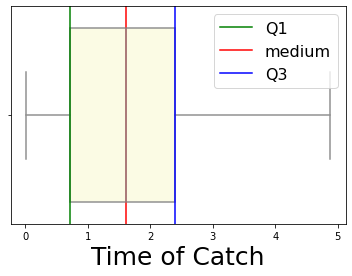

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y_values,color = "lightYellow")

# Vertical lines
quantile = df.Y.quantile([0.25,0.5,0.75])
# confidence_interval with X distributions = (8.758256024452754, 9.71149397554724)
# plt.axvline(mean, color='darkred', label="mean", linestyle='dashed')
plt.axvline(x=quantile.values[0], color='green', label="Q1")
plt.axvline(x=quantile.values[1], color='red', label="medium")
plt.axvline(x=quantile.values[2], color='Blue', label="Q3")
# plt.axvline(x=df.X.min(), color='orange', label="Min", linestyle = "dashed")
# plt.axvline(x=df.X.max(), color='orange', label="Max", linestyle = "dashed")

plt.legend(prop={'size': 16})
plt.xlabel('Time of Catch', size = 25)
plt.savefig('boxplot_x.png')

In [10]:
quantile

0.25    0.7075
0.50    1.6150
0.75    2.4000
Name: Y, dtype: float64

In [11]:
iqr = 2.40 - 0.7075

In [12]:
2.4 + 1.5* iqr

4.93875

In [13]:
df.mode()

,X,Y,Z
0,2.10,0.11,C
1,2.20,0.70,NaN
2,4.13,0.87,NaN


In [14]:
df.X.var()

33.59226212468672

In [15]:
df.Y.var()

1.2280177844611528

## Distribution of X

/Users/AXT6YP7/opt/anaconda3/envs/Data/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


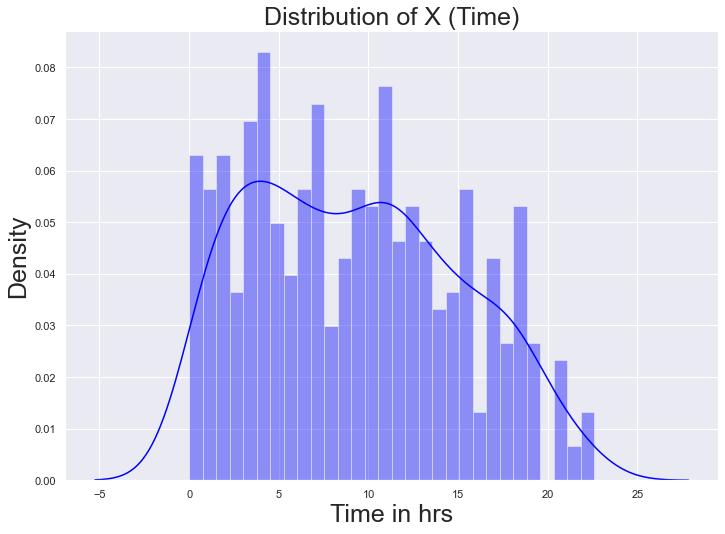

In [16]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})


# seaborn histogram
sns.distplot(df["X"], hist=True, kde=True, 
             bins=int(30), color = 'blue')

plt.title('Distribution of X (Time)', size = 25)
plt.xlabel('Time in hrs', size = 25)
plt.ylabel('Density', size = 25)
plt.savefig('Distribution_of_X.png')

#### Mean Medium and confidence interval

/Users/AXT6YP7/opt/anaconda3/envs/Data/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


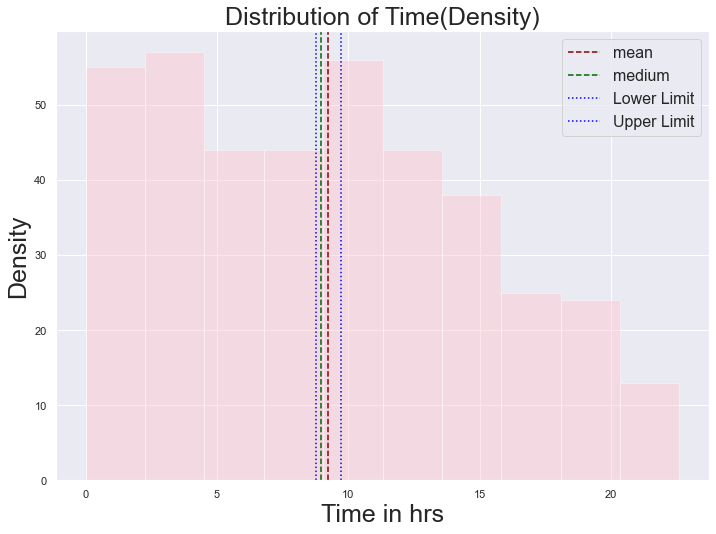

In [17]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})


# seaborn histogram
sns.distplot(df["X"], hist=True, kde=False, 
             bins=int(10), color = 'pink')

# Vertical lines
mean = df["X"].mean()
median = df["X"].median()
std = df["X"].std()

# confidence_interval with X distributions = (8.758256024452754, 9.71149397554724)

plt.axvline(mean, color='darkred', label="mean", linestyle='dashed')
plt.axvline(x=median, color='darkgreen', label="medium", linestyle='dashed')
plt.axvline(8.76, color='blue', label="Lower Limit", linestyle='dotted')
plt.axvline(9.71, color='blue', label="Upper Limit", linestyle='dotted')
plt.legend(prop={'size': 16})

plt.title('Distribution of Time(Density)', size = 25)
plt.xlabel('Time in hrs', size = 25)
plt.ylabel('Density', size = 25)
plt.savefig('mean_medium_confidence_x.png')

In [18]:
df.X.describe()

count    400.000000
mean       9.234825
std        5.795883
min        0.000000
25%        4.262500
50%        8.950000
75%       13.520000
max       22.600000
Name: X, dtype: float64

In [19]:
df.Y.describe()

count    400.00000
mean       1.66740
std        1.10816
min        0.01000
25%        0.70750
50%        1.61500
75%        2.40000
max        4.88000
Name: Y, dtype: float64

In [20]:
2.40 - 0.71

1.69

## Distribution for Y

/Users/AXT6YP7/opt/anaconda3/envs/Data/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


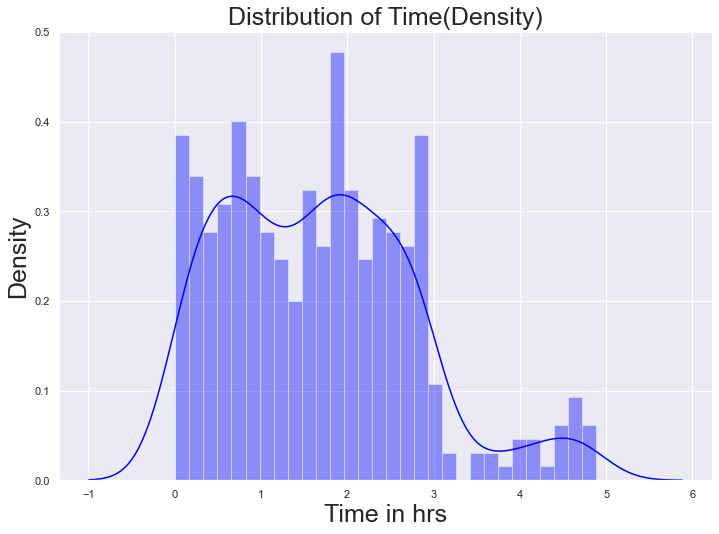

In [21]:
# seaborn histogram
# seaborn histogram
sns.distplot(df["Y"], hist=True, kde=True, 
             bins=int(30), color = 'Blue')

plt.title('Distribution of Time(Density)', size = 25)
plt.xlabel('Time in hrs', size = 25)
plt.ylabel('Density', size = 25)
plt.savefig('Distribution_of_Y.png')

#### mean medium and confidence interval

####  ******************Change the confidence****************

In [22]:
confidence_interval = 1.96 * (df["Y"].std()/25)
confidence_interval_1 = df["Y"].mean() + confidence_interval
confidence_interval_2 = df["Y"].mean() - confidence_interval
confidence_interval_1, confidence_interval_2

(1.7542797156605472, 1.5805202843394528)

In [23]:
pip install statistics

Note: you may need to restart the kernel to use updated packages.


In [24]:
df_a = df[df["Z"] == "A"]['X']
df_b = df[df["Z"] == "B"]['X']
df_c = df[df["Z"] == "C"]['X']

In [25]:
df_a.min(), df_a.max()

(0.15, 20.47)

In [26]:
df_b.min(), df_a.max()

(0.43, 20.47)

In [27]:
df_c.min(), df_c.max()

(0.0, 22.6)

/Users/AXT6YP7/opt/anaconda3/envs/Data/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


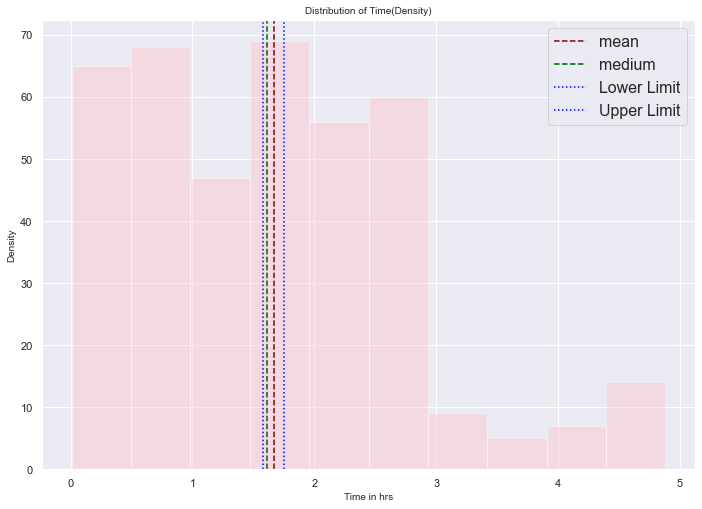

In [28]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})


# seaborn histogram
sns.distplot(df["Y"], hist=True, kde=False, 
             bins=int(10), color = 'pink')

# Vertical lines
mean = df["Y"].mean()
median = df["Y"].median()
std = df["Y"].std()

# confidence_interval with X distributions = (8.758256024452754, 9.71149397554724)

plt.axvline(mean, color='darkred', label="mean", linestyle='dashed')
plt.axvline(x=median, color='darkgreen', label="medium", linestyle='dashed')
plt.axvline(confidence_interval_1, color='blue', label="Lower Limit", linestyle='dotted')
plt.axvline(confidence_interval_2, color='blue', label="Upper Limit", linestyle='dotted')
plt.legend(prop={'size': 16})

plt.title('Distribution of Time(Density)', size = 10)
plt.xlabel('Time in hrs', size = 10)
plt.ylabel('Density', size = 10)
plt.savefig('mean_medium_confidence_Y.png')


## Effectiveness of bait

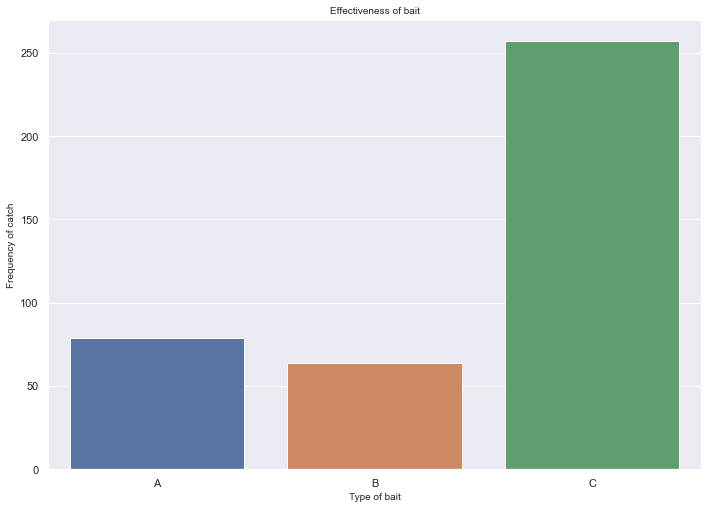

In [29]:
sns.barplot(data=df.groupby(['Z']).count().reset_index(), x = "Z", y = "Y")
# Add labels
plt.title('Effectiveness of bait', size = 10)
plt.xlabel('Type of bait', size = 10)
plt.ylabel('Frequency of catch',size = 10)
plt.savefig('Effective_Frequency.png')

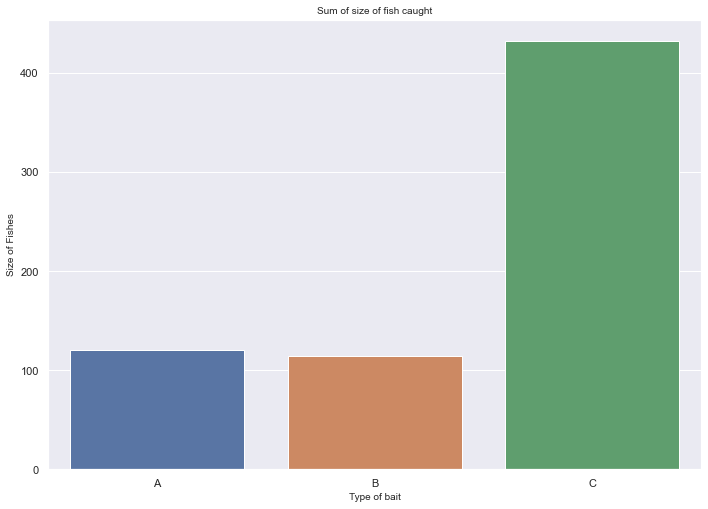

In [30]:
df_size_bait = df.groupby(['Z']).sum().reset_index()
sns.barplot(data=df_size_bait, x = "Z", y = "Y")
# Add labels
plt.title('Sum of size of fish caught', size = 10)
plt.xlabel('Type of bait', size = 10)
plt.ylabel('Size of Fishes',size = 10)
plt.savefig('Effective_Sum.png')

# BoX plot explainig Spread

/Users/AXT6YP7/opt/anaconda3/envs/Data/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


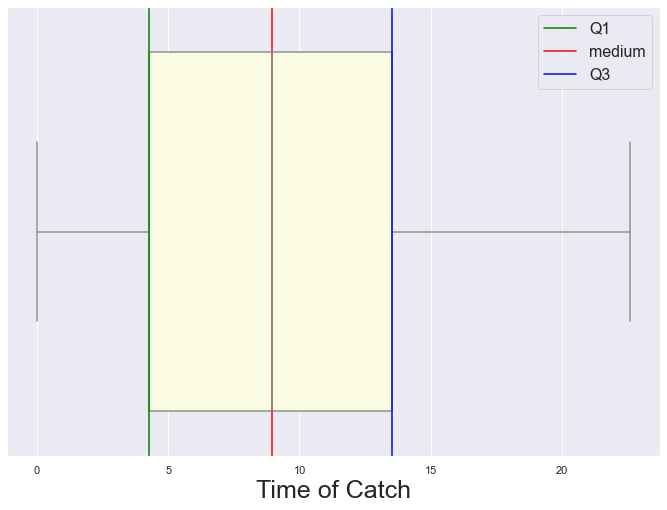

In [31]:

sns.boxplot(df['X'],color = "lightYellow")

# Vertical lines
quantile = df.X.quantile([0.25,0.5,0.75])
# confidence_interval with X distributions = (8.758256024452754, 9.71149397554724)
# plt.axvline(mean, color='darkred', label="mean", linestyle='dashed')
plt.axvline(x=quantile.values[0], color='green', label="Q1")
plt.axvline(x=quantile.values[1], color='red', label="medium")
plt.axvline(x=quantile.values[2], color='Blue', label="Q3")
# plt.axvline(x=df.X.min(), color='orange', label="Min", linestyle = "dashed")
# plt.axvline(x=df.X.max(), color='orange', label="Max", linestyle = "dashed")

plt.legend(prop={'size': 16})
plt.xlabel('Time of Catch', size = 25)
plt.savefig('boxplot_x.png')

/Users/AXT6YP7/opt/anaconda3/envs/Data/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


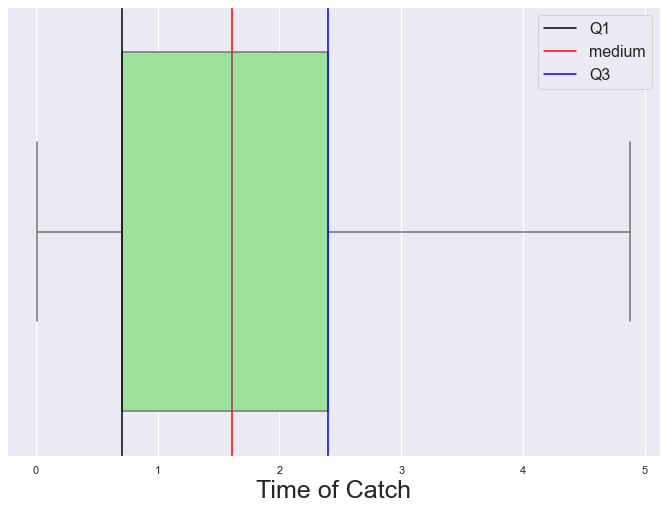

In [32]:
sns.boxplot(df['Y'],color = "lightgreen")

# Vertical lines
quantile = df.Y.quantile([0.25,0.5,0.75])
# confidence_interval with X distributions = (8.758256024452754, 9.71149397554724)
# plt.axvline(mean, color='darkred', label="mean", linestyle='dashed')
plt.axvline(x=quantile.values[0], color='Black', label="Q1")
plt.axvline(x=quantile.values[1], color='red', label="medium")
plt.axvline(x=quantile.values[2], color='Blue', label="Q3")
plt.legend(prop={'size': 16})
plt.xlabel('Time of Catch', size = 25)
plt.savefig('boxplot_y.png')

### Question 2:

In [33]:
# In a second step, it is of interest to analyse the dependence between time of catch (X
# value) , size of catch (Y value), and the type of bait used (Z). Generate suitable plots
# to analyze these relationships and characterize them by statistical measures. What is
# the correlation between X and Y? Analyse the amount of information about Y that is
# given by knowledge of X.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       400 non-null    float64
 1   Y       400 non-null    float64
 2   Z       400 non-null    object 
dtypes: float64(2), object(1)
memory usage: 9.5+ KB


In [35]:
# Analyse the dependence between time of catch (X value) , 
# size of catch (Y value), and the type of bait used (Z)

#### Amount of fishes caught per hr

In [36]:
df_time = pd.DataFrame()
count_time = []
Sum_size = []
for i in range(25):
    start = i
    end = i+1
    count_time.append(df[(df.X > start) & (df.X <= end)].count().X)
    Sum_size.append(df[(df.X > start) & (df.X <= end)].Y.sum())
df_time["Frequency"] = count_time
df_time["Sum"] = Sum_size


A = []
B = []
C = []
Sum_of_A = []
Sum_of_B = []
Sum_of_C = []
for i in range(25):
    start = i
    end = i+1
    df_temp = df[(df.X > start) & (df.X <= end)]
    try:
        A.append(df_temp["Z"].value_counts()["A"])
        Sum_of_A.append(df_temp[df_temp["Z"]=="A"]["Y"].sum())
    except:
        A.append(0)
        Sum_of_A.append(df_temp[df_temp["Z"]=="A"]["Y"].sum())
    try:
        B.append(df_temp["Z"].value_counts()["B"])
        Sum_of_B.append(df_temp[df_temp["Z"]=="B"]["Y"].sum())
    except:
        B.append(0)
        Sum_of_B.append(df_temp[df_temp["Z"]=="B"]["Y"].sum())
    try:
        C.append(df_temp["Z"].value_counts()["C"]) 
        Sum_of_C.append(df_temp[df_temp["Z"]=="C"]["Y"].sum())
    except:
        C.append(0)
        Sum_of_C.append(df_temp[df_temp["Z"]=="C"]["Y"].sum())
        
df_time["A"] = A
df_time["B"] = B
df_time["C"] = C     
df_time["Sum_of_A"] = Sum_of_A
df_time["Sum_of_B"] = Sum_of_B
df_time["Sum_of_C"] = Sum_of_C 

In [40]:
# At count and cum of weight

df_time.iloc[15]

Frequency    18.00
Sum          22.71
A             2.00
B             6.00
C            10.00
Sum_of_A      0.59
Sum_of_B      9.34
Sum_of_C     12.78
Name: 15, dtype: float64

In [41]:
average_a = 0.59/2
average_b = 9.34/6
average_c = 12.78/10
average_a, average_b, average_c

(0.295, 1.5566666666666666, 1.278)

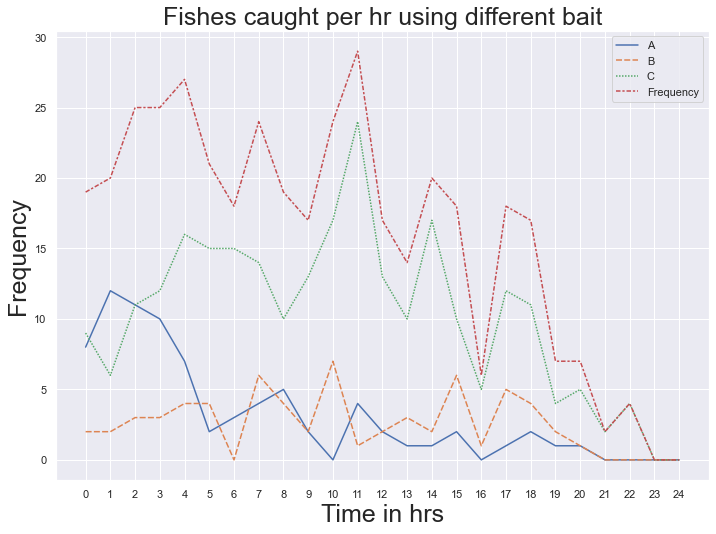

In [ ]:
sns.lineplot(data= df_time[["A","B","C","Frequency"]])
# Add labels
plt.xticks(range(25))
plt.title('Fishes caught per hr using different bait',size = 25)
plt.xlabel('Time in hrs',size = 25)
plt.ylabel('Frequency',size = 25)
plt.savefig('Fishes caught per hr.png')

#### Size of fishes caught per hr

In [ ]:
df_time.columns

Index(['Frequency', 'Sum', 'A', 'B', 'C', 'Sum_of_A', 'Sum_of_B', 'Sum_of_C'], dtype='object')

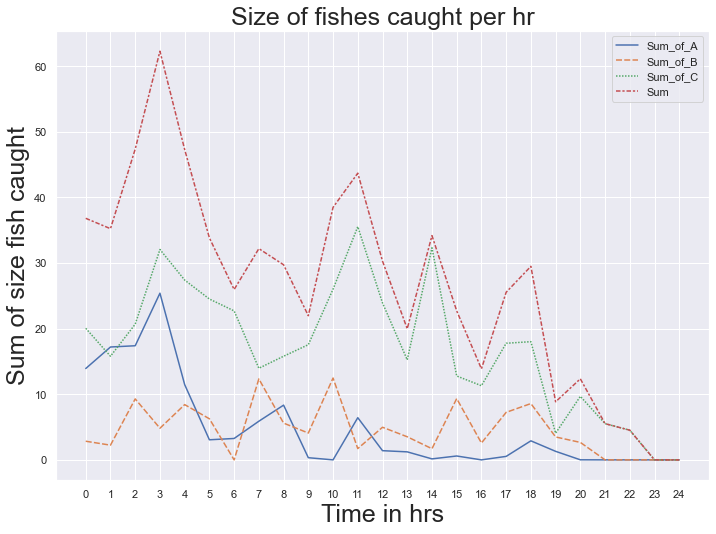

In [ ]:
sns.lineplot(data= df_time[["Sum_of_A","Sum_of_B","Sum_of_C","Sum"]])
# Add labels
plt.xticks(range(25))
plt.title('Size of fishes caught per hr',size = 25)
plt.xlabel('Time in hrs',size = 25)
plt.ylabel('Sum of size fish caught',size = 25)
plt.savefig('Sum of size fish caught.png')

# Correlation between X , Y and Z

In [ ]:
df['Z'].replace(['A', 'B', 'C'], [0, 1, 2], inplace=True)

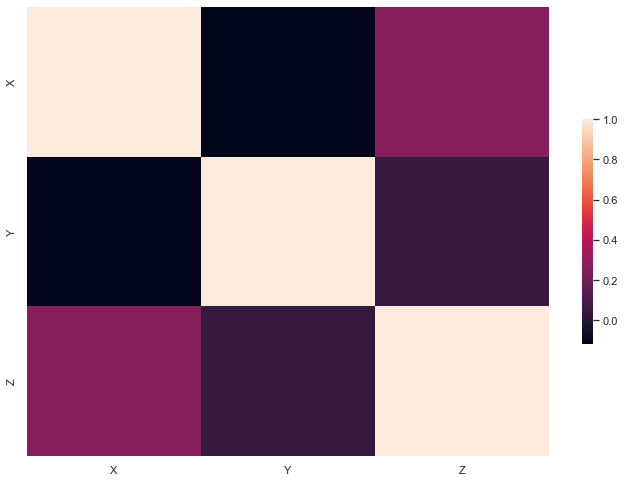

In [ ]:
import seaborn as sns

# calculate the correlation matrix
corr = df[["X", "Y","Z"]].corr()

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,cbar_kws={"shrink": .5})
plt.savefig('coorelation.png')

In [ ]:
corr

,X,Y,Z
X,1.000000,-0.117528,0.264352
Y,-0.117528,1.000000,0.040660
Z,0.264352,0.040660,1.000000


## Rsquared value